In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("C:/python/Air_bnb/Airbnb_Data.csv")

# Data Pre-Processing

In [3]:
df.shape

(74111, 29)

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
# droping columns that are not useful
df.drop(columns = ['id','description','host_has_profile_pic',
                   'latitude','longitude','neighbourhood',
                   'first_review','last_review','accommodates',
                   'host_response_rate','thumbnail_url','name',
                   'amenities','host_since'
                  ],inplace = True)

In [6]:
df.head()

,log_price,property_type,room_type,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,t,f,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,f,t,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,NYC,t,t,10,92.0,10027,1.0,3.0
3,6.620073,House,Entire home/apt,1.0,Real Bed,flexible,True,SF,t,f,0,NaN,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,DC,t,t,4,40.0,20009,0.0,1.0


In [7]:
df.shape

(74111, 15)

In [8]:
df.duplicated().sum()

452

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
bathrooms                   198
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_identity_verified      188
instant_bookable              0
number_of_reviews             0
review_scores_rating      16378
zipcode                     965
bedrooms                     91
beds                        130
dtype: int64

In [12]:
# Converting log_price to the  actual price 

In [13]:
# I am filling missing values in bedroomes with mode of the bedrooms
df.fillna({'bedrooms':df['bedrooms'].mode()[0]}, inplace = True)

In [14]:
# It makes sense to fill the null values in the bathroom same as the number of bedrooms 
df.fillna({'bathrooms':df['bedrooms']},inplace=True)

In [15]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_identity_verified      188
instant_bookable              0
number_of_reviews             0
review_scores_rating      16378
zipcode                     965
bedrooms                      0
beds                        130
dtype: int64

In [16]:
# host_identity_verified
df['host_identity_verified'].value_counts()

host_identity_verified
t    49509
f    23962
Name: count, dtype: int64

In [17]:
# i am filling the values randomely as there are only 188 null values this will not have any impact 

null_count = df['host_identity_verified'].isnull().sum()

random_values = np.random.choice([True, False], size=null_count)

df['host_identity_verified'].fillna(pd.Series(random_values, index=df.index[df['host_identity_verified'].isnull()]), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14044\3492161854.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_identity_verified'].fillna(pd.Series(random_values, index=df.index[df['host_identity_verified'].isnull()]), inplace=True)


In [18]:
df['host_identity_verified'].isna().sum()

0

In [19]:
# filling review rating score with mean of the column 
df.fillna({'review_scores_rating': df['review_scores_rating'].mean()}, inplace = True)

In [20]:
df['review_scores_rating'].isna().sum()

0

In [21]:
# for the zip code i wil try to find there respective city's zip  code and then fill them 

city_zip_mapping = df.groupby('city')['zipcode'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Fill null values in 'zipcode' column based on city
null_mask = df['zipcode'].isnull()
df.loc[null_mask, 'zipcode'] = df.loc[null_mask, 'city'].map(city_zip_mapping).fillna(df.loc[null_mask, 'zipcode'])

In [22]:
df['zipcode'].isna().sum()

0

In [23]:
# at last i am filling number of beds with the number of bedrooms 
df.fillna({'beds': df['bedrooms']}, inplace = True)

In [24]:
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_identity_verified    0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [25]:
df.shape

(73659, 15)

# Handeling the Outliers 

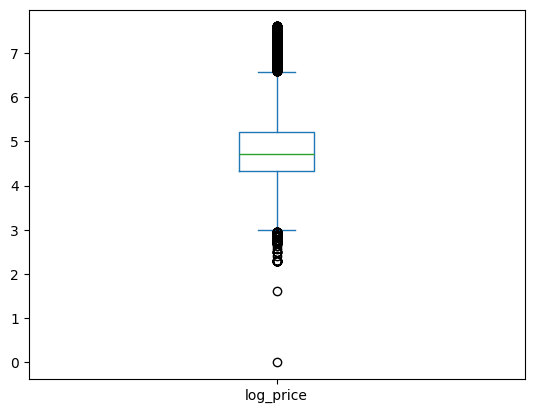

In [26]:
# removing outliers in log_price column using IQR method
df['log_price'].plot(kind = 'box')
plt.show()

In [27]:
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

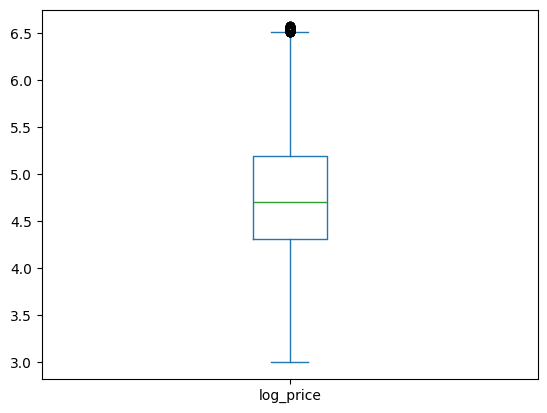

In [28]:
df['log_price'].plot(kind ='box')
plt.show()

In [29]:
df.shape

(72134, 15)

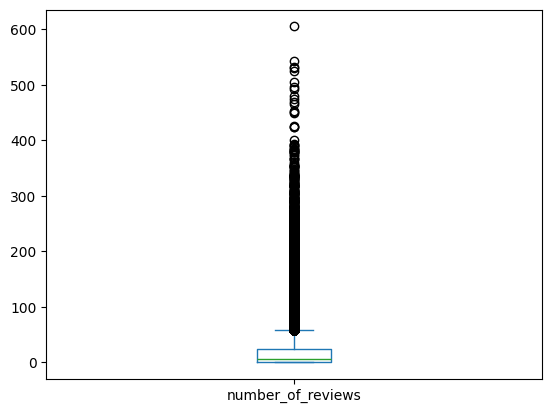

In [30]:
df['number_of_reviews'].plot(kind = 'box')
plt.show()
# these are not outliers as it shows how many reviews are given to a listing so i am not going to remove them 

# EDA

In [31]:
df.head()

,log_price,property_type,room_type,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,t,f,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,f,t,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,NYC,t,t,10,92.0,10027,1.0,3.0
4,4.744932,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,DC,t,t,4,40.0,20009,0.0,1.0
5,4.442651,Apartment,Private room,1.0,Real Bed,strict,True,SF,t,t,3,100.0,94131,1.0,1.0


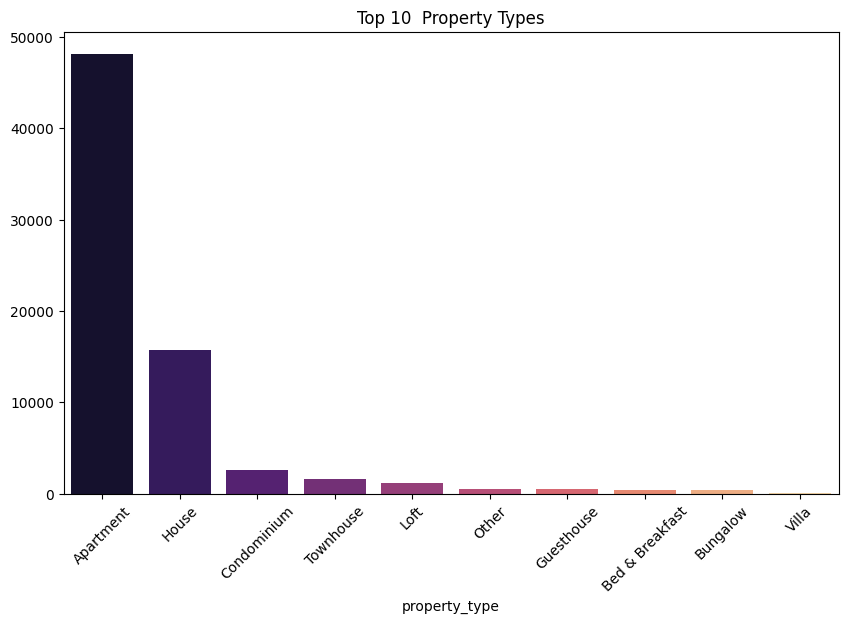

In [32]:
plt.figure(figsize=(10,6))
property_type_count = df['property_type'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x = property_type_count.index , y = property_type_count.values , hue = property_type_count.index, palette = 'magma')
plt.xticks(rotation = 45)
plt.title('Top 10  Property Types')
plt.show()
# There are most number of apartments listed followed by house 

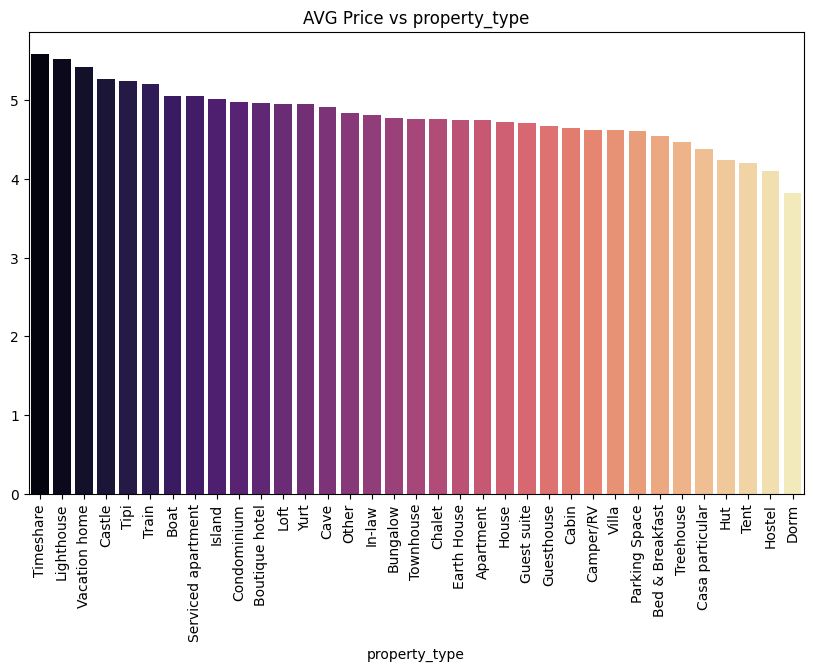

In [33]:
# avg price vs property_type

avg_price = df.groupby('property_type').log_price.mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x = avg_price.index , y = avg_price.values , hue = avg_price.index, palette = 'magma')
plt.xticks(rotation = 90)
plt.title('AVG Price vs property_type')
plt.show()

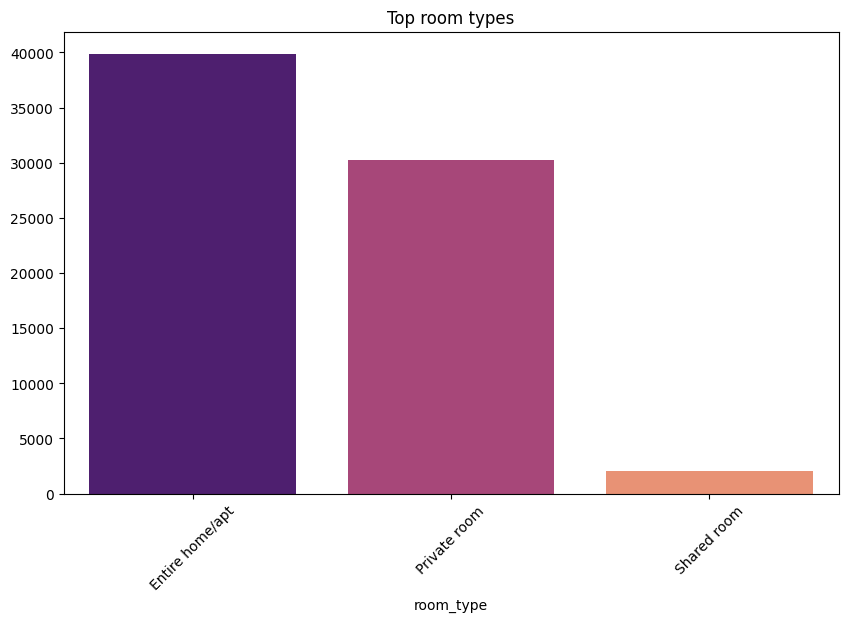

In [34]:
plt.figure(figsize=(10,6))
property_type_count = df['room_type'].value_counts().sort_values(ascending=False)
sns.barplot(x = property_type_count.index , y = property_type_count.values , hue = property_type_count.index, palette = 'magma')
plt.xticks(rotation = 45)
plt.title('Top room types')
plt.show()
# There are most number of apartments listed followed by house 

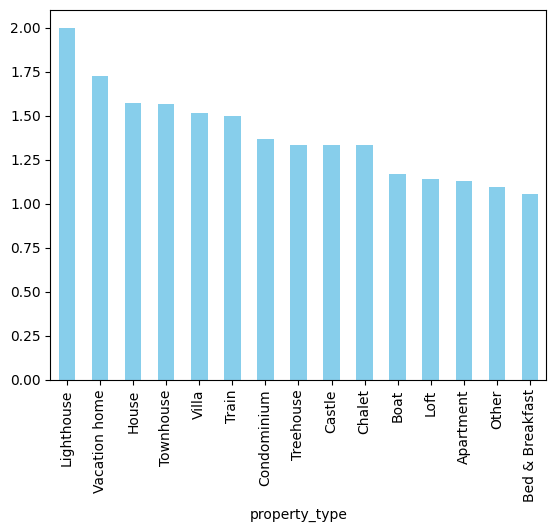

In [35]:
# property type vs bedrooms
Pbedrooms = df.groupby('property_type').bedrooms.mean().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'skyblue')

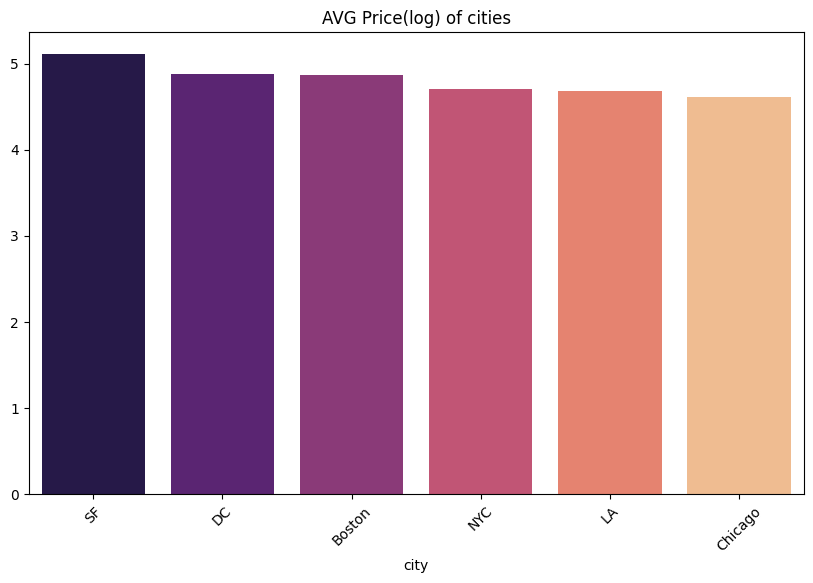

In [36]:
# avg price vs city 

avg_price = df.groupby('city').log_price.mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x = avg_price.index , y = avg_price.values , hue = avg_price.index, palette = 'magma')
plt.xticks(rotation = 45)
plt.title('AVG Price(log) of cities')
plt.show()

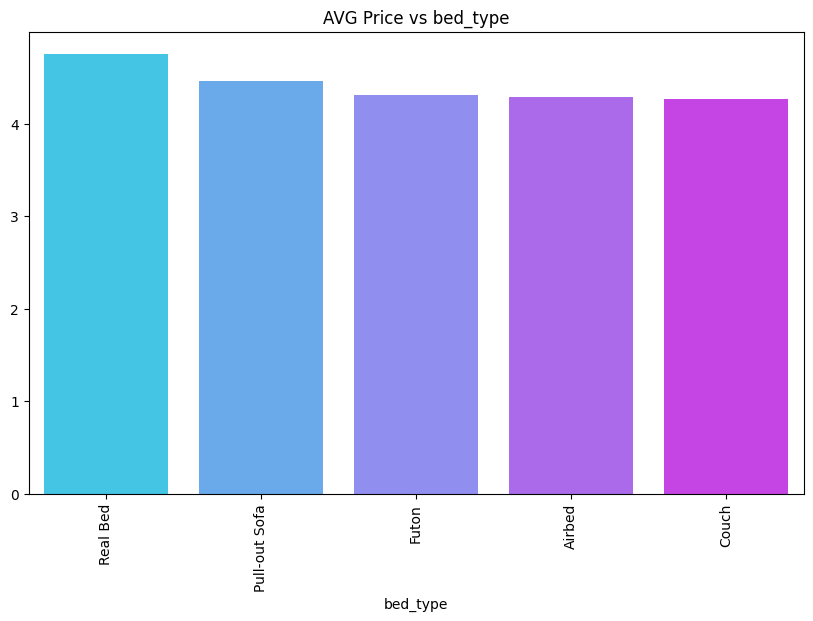

In [37]:
# bed type vs log_price 

avg_price = df.groupby('bed_type').log_price.mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x = avg_price.index , y = avg_price.values , hue = avg_price.index, palette = 'cool')
plt.xticks(rotation = 90)
plt.title('AVG Price vs bed_type')
plt.show()

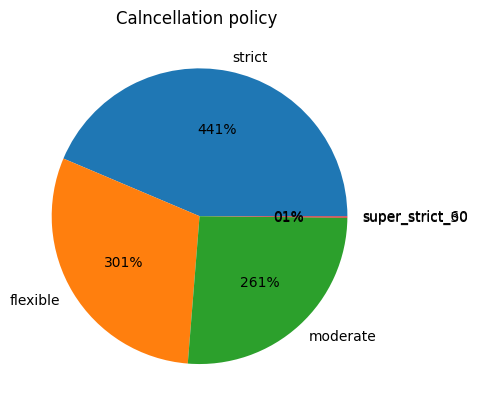

In [38]:
df['cancellation_policy'].value_counts().plot(kind = 'pie' , autopct = "%1.f1%%")
plt.ylabel("")
plt.title("Calncellation policy ")
plt.show()

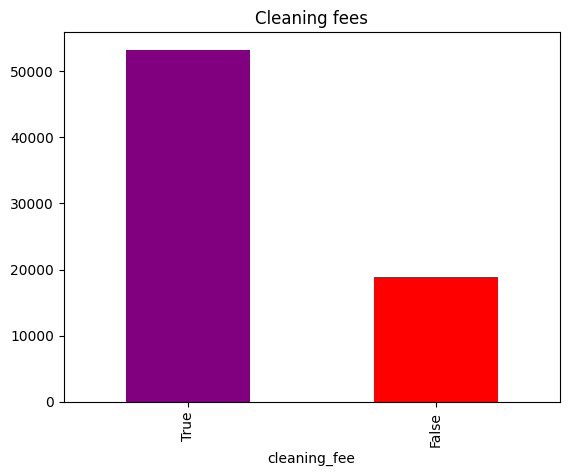

In [39]:
df.cleaning_fee.value_counts().plot(kind = 'bar' , color =['purple','red'])
plt.title('Cleaning fees')
plt.show()

In [40]:
df.head()

,log_price,property_type,room_type,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,t,f,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,f,t,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,NYC,t,t,10,92.0,10027,1.0,3.0
4,4.744932,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,DC,t,t,4,40.0,20009,0.0,1.0
5,4.442651,Apartment,Private room,1.0,Real Bed,strict,True,SF,t,t,3,100.0,94131,1.0,1.0


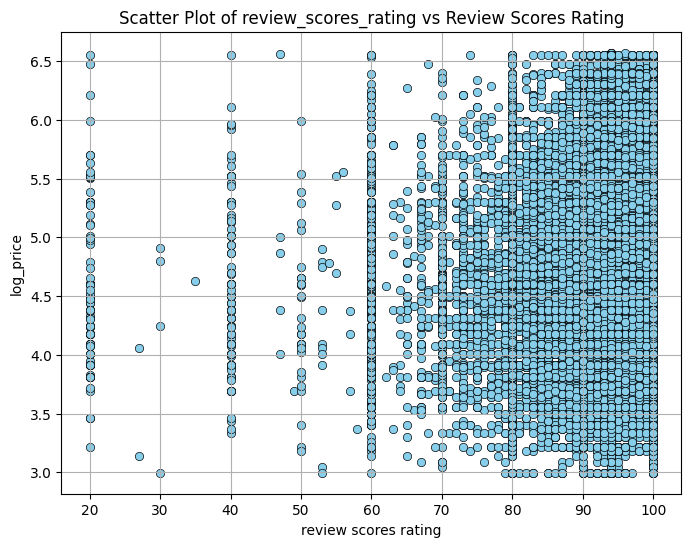

In [41]:
# Number of reviews vs price 

plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_scores_rating', y='log_price', data=df, color='skyblue', edgecolor='black')
plt.title('Scatter Plot of review_scores_rating vs Review Scores Rating')
plt.xlabel('review scores rating')
plt.ylabel('log_price')
plt.grid(True)  # Add grid lines
plt.show()

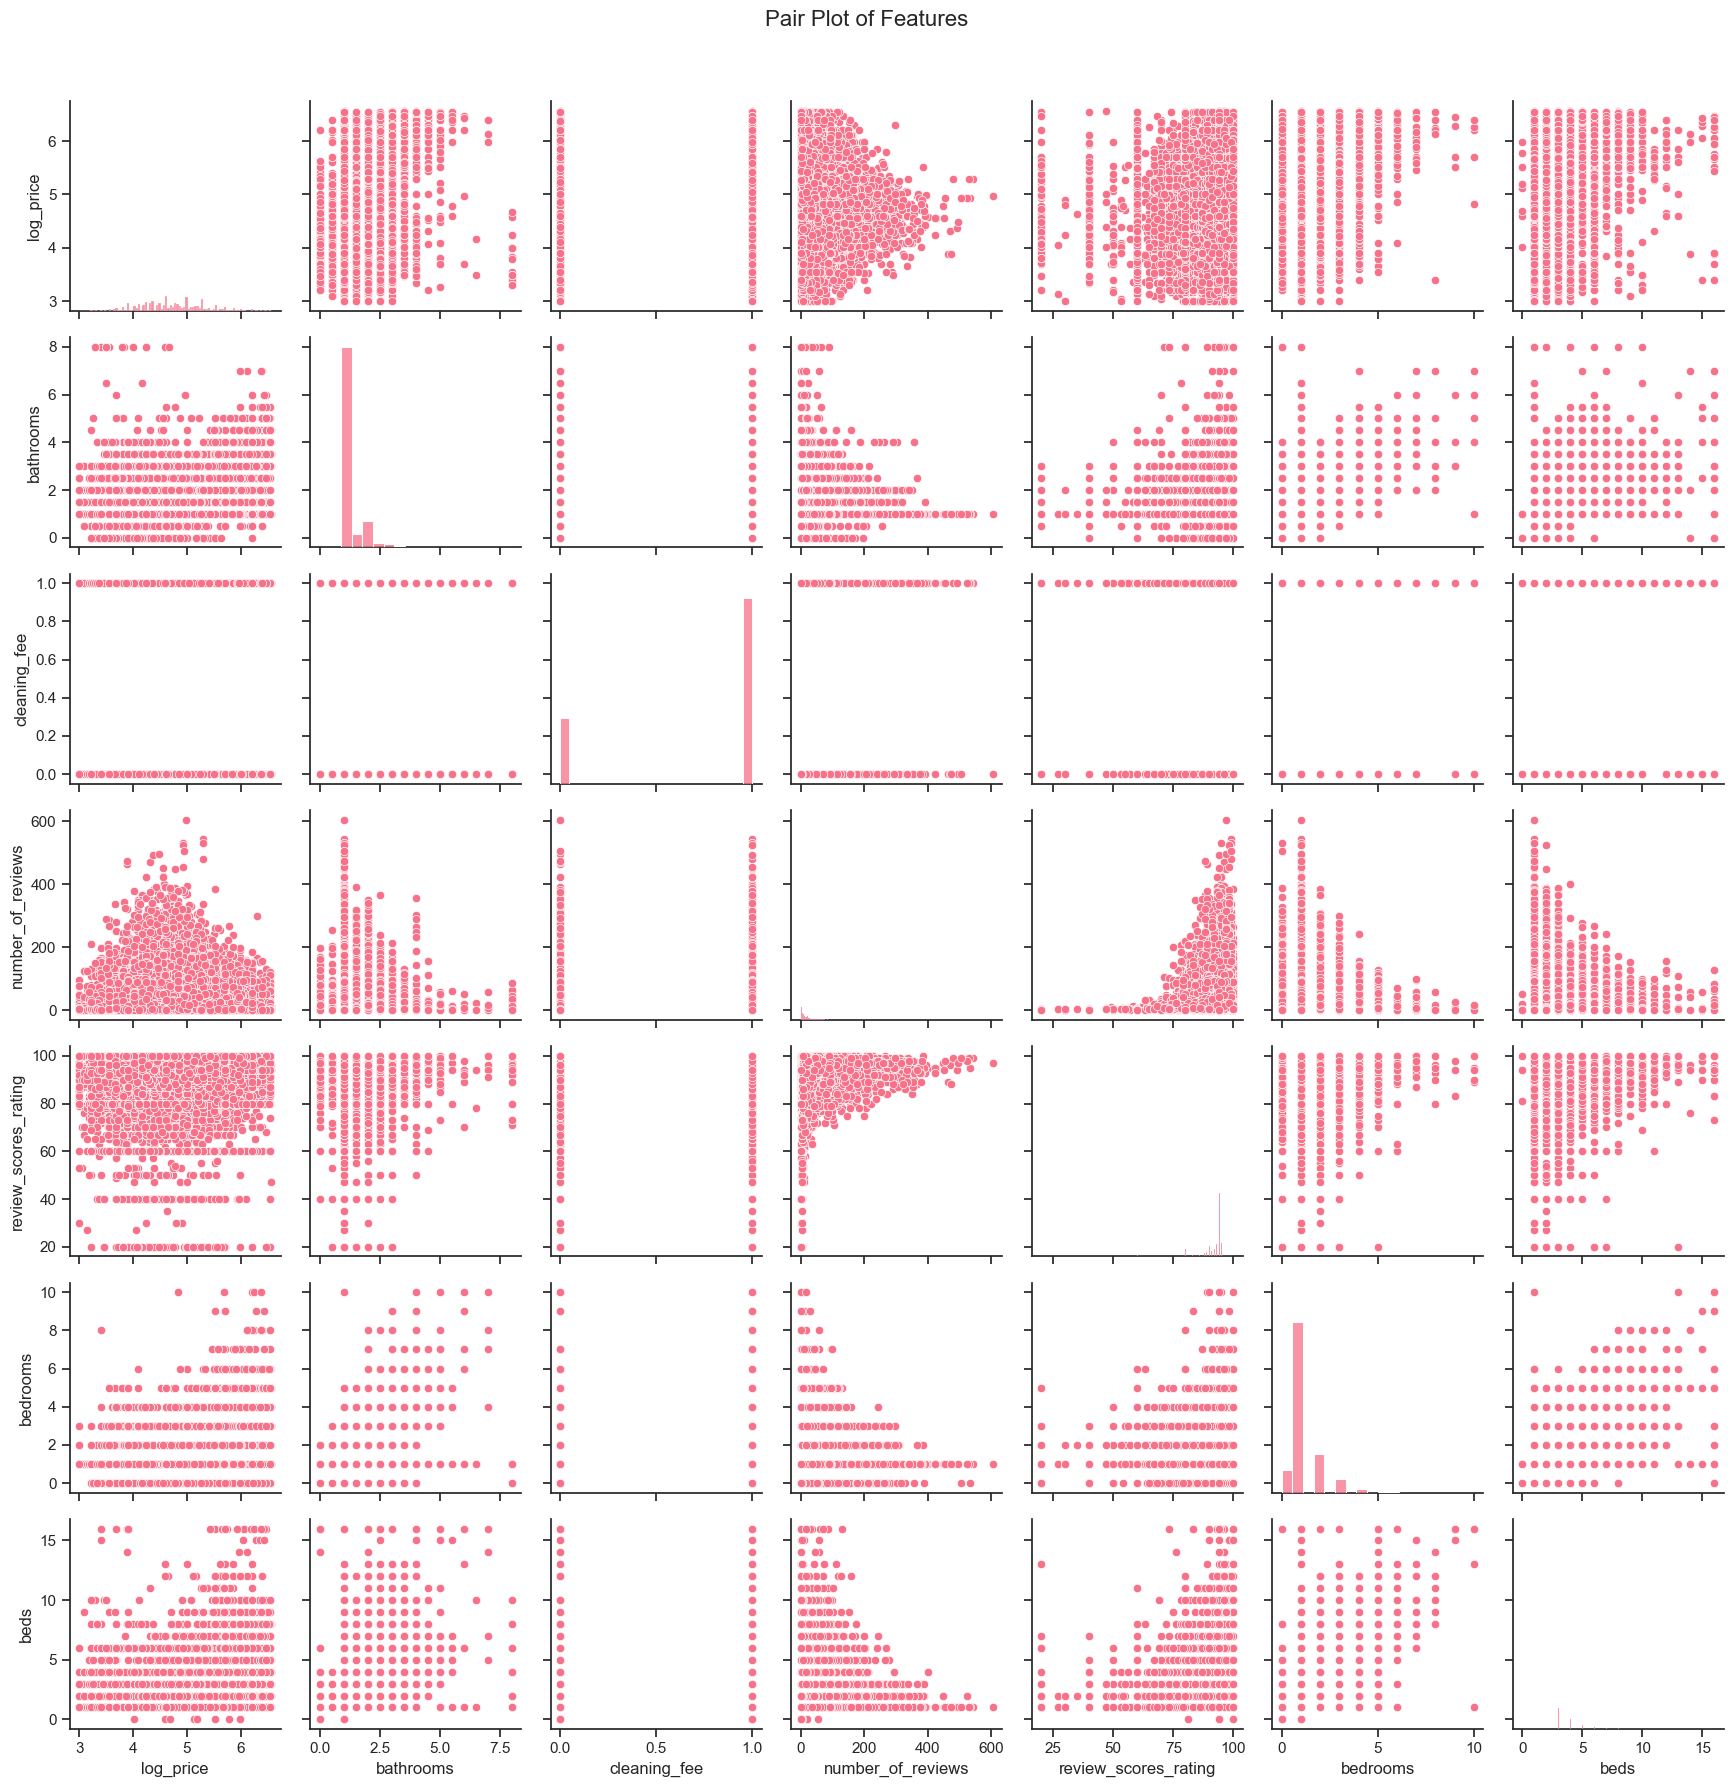

In [42]:
sns.set(style="ticks", palette="husl")
sns.pairplot(df, kind='scatter')
plt.suptitle('Pair Plot of Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               72134 non-null  float64
 1   property_type           72134 non-null  object 
 2   room_type               72134 non-null  object 
 3   bathrooms               72134 non-null  float64
 4   bed_type                72134 non-null  object 
 5   cancellation_policy     72134 non-null  object 
 6   cleaning_fee            72134 non-null  bool   
 7   city                    72134 non-null  object 
 8   host_identity_verified  72134 non-null  object 
 9   instant_bookable        72134 non-null  object 
 10  number_of_reviews       72134 non-null  int64  
 11  review_scores_rating    72134 non-null  float64
 12  zipcode                 72134 non-null  object 
 13  bedrooms                72134 non-null  float64
 14  beds                    72134 non-null  flo

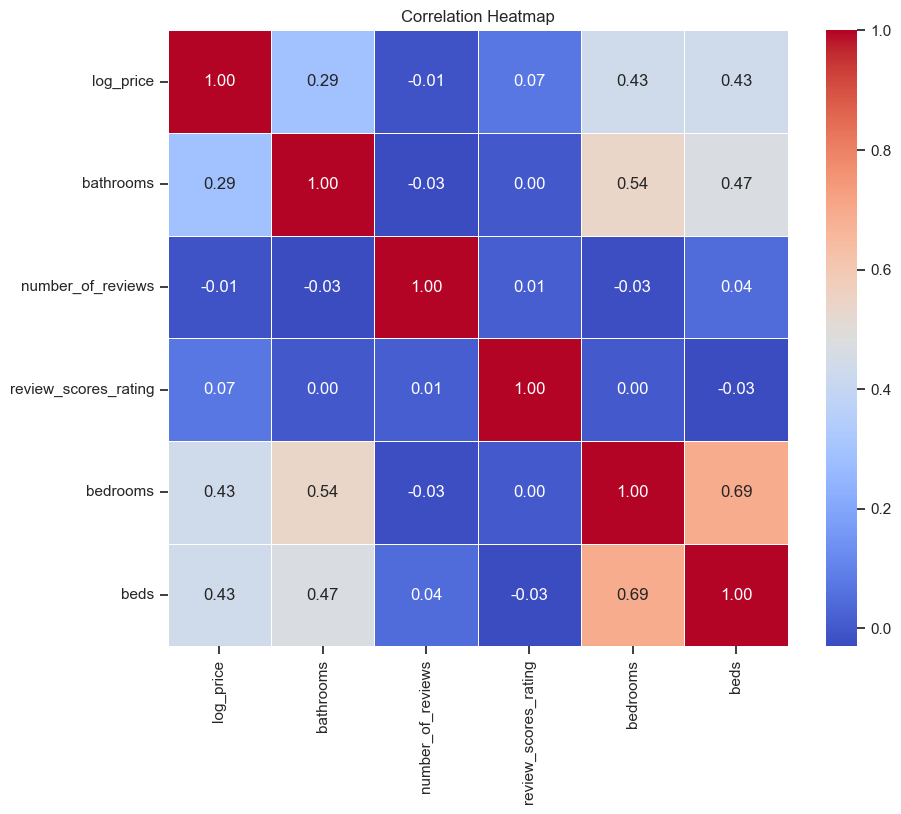

In [44]:
# heatmap
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes(np.number)
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap')
plt.show()

# Model building and evaluation

In [45]:
df.head()

,log_price,property_type,room_type,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,t,f,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,f,t,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,NYC,t,t,10,92.0,10027,1.0,3.0
4,4.744932,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,DC,t,t,4,40.0,20009,0.0,1.0
5,4.442651,Apartment,Private room,1.0,Real Bed,strict,True,SF,t,t,3,100.0,94131,1.0,1.0


In [46]:
cols = ['room_type','bed_type','cancellation_policy','city','property_type']
df = pd.get_dummies(df, columns=cols)

In [47]:
df.head()

,log_price,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,5.010635,1.0,True,t,f,2,100.0,11201,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,5.129899,1.0,True,f,t,6,93.0,10019,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,4.976734,1.0,True,t,t,10,92.0,10027,1.0,3.0,...,False,False,False,False,False,False,False,False,False,False
4,4.744932,1.0,True,t,t,4,40.0,20009,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
5,4.442651,1.0,True,t,t,3,100.0,94131,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [48]:
df['host_identity_verified'] = df['host_identity_verified'].replace({'t':True,'f':False}).infer_objects(copy=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_14044\632361211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_identity_verified'] = df['host_identity_verified'].replace({'t':True,'f':False}).infer_objects(copy=False)


In [49]:
df['instant_bookable'] = df['instant_bookable'].replace({'t':True,'f':False}).infer_objects(copy=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2548158149.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instant_bookable'] = df['instant_bookable'].replace({'t':True,'f':False}).infer_objects(copy=False)


In [50]:
df.drop(columns=['zipcode'],inplace=True)

In [51]:
def normalize_columns(df, columns):
    for col in columns:
        # Min-max normalization: (x - min) / (max - min)
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)

columns_to_normalize = ['bathrooms','number_of_reviews','review_scores_rating','bedrooms','beds']

normalize_columns(df, columns_to_normalize)

In [52]:
df.head()

,log_price,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,5.010635,0.125,True,True,False,0.003306,1.0000,0.1,0.0625,True,...,False,False,False,False,False,False,False,False,False,False
1,5.129899,0.125,True,False,True,0.009917,0.9125,0.3,0.1875,True,...,False,False,False,False,False,False,False,False,False,False
2,4.976734,0.125,True,True,True,0.016529,0.9000,0.1,0.1875,True,...,False,False,False,False,False,False,False,False,False,False
4,4.744932,0.125,True,True,True,0.006612,0.2500,0.0,0.0625,True,...,False,False,False,False,False,False,False,False,False,False
5,4.442651,0.125,True,True,True,0.004959,1.0000,0.1,0.0625,False,...,False,False,False,False,False,False,False,False,False,False


CatBoost Regression model accuracy: 57.96%


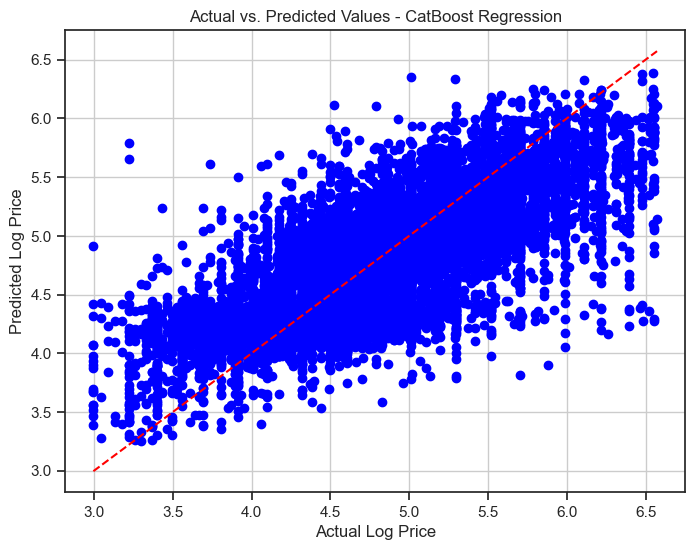

In [56]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df.drop('log_price', axis=1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(silent=True) 
catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

accuracy_percentage = r_squared * 100

print(f"CatBoost Regression model accuracy: {accuracy_percentage:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs. Predicted Values - CatBoost Regression')
plt.grid(True)
plt.show()